In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from warnings import simplefilter
from tabulate import tabulate

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
parameter = {'axes.titlesize':'xx-large','axes.labelsize': 'medium',
          'xtick.labelsize':'large','ytick.labelsize':'large'}
pylab.rcParams.update(parameter)

In [3]:
alternative = pd.read_csv('alternative.csv', header = 0)
blues = pd.read_csv('blues.csv', header = 0)
childrens_music = pd.read_csv('childrens music.csv', header = 0)
comedy = pd.read_csv('comedy.csv', header = 0)
electronic = pd.read_csv('electronic.csv', header = 0)
folk = pd.read_csv('folk.csv', header = 0)
hiphop = pd.read_csv('hip-hop.csv', header = 0)
movie = pd.read_csv('movie.csv', header = 0)
ska = pd.read_csv('ska.csv', header = 0)
soul = pd.read_csv('soul.csv', header = 0)

In [4]:
datasets = [alternative, blues, childrens_music, comedy, electronic, folk, hiphop, movie, ska, soul]
names = ['alternative', 'blues', 'childrens_music', 'comedy','electronic', 'folk', 'hiphop', 'movie', 'ska', 'soul']

# Part 1 : Core - Dataset exploration

In [5]:
def correlation(A,B):
    x = 0;
    index = [5,6,8,9,11,12,14,17]
    fig, ax = plt.subplots(1,2, figsize=(15,5), dpi=300)
    plt.tight_layout(pad = 0.1)
    
    for dataset, name in zip(datasets[A:B], names[A:B]):
        var = dataset.columns[index].tolist()
        corr = dataset[[var[0],var[1],var[2],var[3],
                   var[4],var[5],var[6],var[7]]].corr().round(3)
        
        if (x == 0):
            sns.heatmap(ax = ax[x], data = corr, annot=True, xticklabels=True, yticklabels=True)
        else:
            sns.heatmap(ax = ax[x], data = corr, annot=True, xticklabels=True, yticklabels=False)
            
        ax[x].set(title = name)
        x += 1;
     

    plt.show()
    

In [6]:
def boxplot():
    index = [5,6,8,9,11,14,17]
    fig, ax = plt.subplots(7,10, figsize=(20, 20), dpi=300)
    plt.tight_layout(pad = 2.0)
    
    for j in range(0, len(index)):
        x = 0
        for dataset, name in zip(datasets, names):
            var = dataset.columns[index[j]]
            value = dataset[var]
        
            if (x == 0):
                sns.boxplot(ax = ax[j,x], data = value)
                ax[j,x].set(xlabel = name, ylabel = var)
            else:
                sns.boxplot(ax = ax[j,x], data = value)
                ax[j,x].set(xlabel = name)
            
            x += 1;
        
    plt.show()

In [7]:
def bargraphs(S,E):
    x = 0;
    index = [5,6,8,9,11,14,17]
    fig, ax = plt.subplots(1,5, figsize=(20, 5), dpi=300)
    plt.tight_layout(pad = 2.0)
    
    for dataset, name in zip(datasets[S:E], names[S:E]):
        var = dataset.columns[index].tolist()
        bar = dataset[[var[0],var[1],var[2],var[3],var[4],var[5],var[6]]]
        
        if (x == 0):
            sns.barplot(ax = ax[x], data = bar)
            ax[x].tick_params(labelrotation=90)
        else:
            sns.barplot(ax = ax[x], data = bar)
            ax[x].tick_params(labelrotation=90)
            
        ax[x].set(title = name)
        x += 1;
        
    plt.show()

In [8]:
def feature_interaction():
    dataset = datasets[0]
    for k in range(1, len(datasets)): dataset = pd.concat([dataset, datasets[k]])
    dataset = dataset.reset_index()
    
    X = dataset[['loudness']]
    y = dataset['energy']
    
    scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X)
        
    output = pd.DataFrame(dataset['instance_id'])
    output['loudness'] = dataset['loudness']
    output = pd.merge(output, dataset[['instance_id', 'energy']], on='instance_id', how='left')
    output['Prediction'] = y_pred

    return output

In [9]:
def feature_interaction1():
    dataset = datasets[0]
    for k in range(1, len(datasets)): dataset = pd.concat([dataset, datasets[k]])
    dataset = dataset.reset_index()
    
    X = dataset[['danceability']]
    y = dataset['valence']
    
    scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)

    model1 = LinearRegression().fit(X_train, y_train)
    y_pred1 = model1.predict(X)
        
    output1 = pd.DataFrame(dataset['instance_id'])
    output1['danceability'] = dataset['danceability']
    output1 = pd.merge(output1, dataset[['instance_id', 'valence']], on='instance_id', how='left')
    output1['Prediction'] = y_pred1

    return output1

# Part 1 : Core- Visualisation

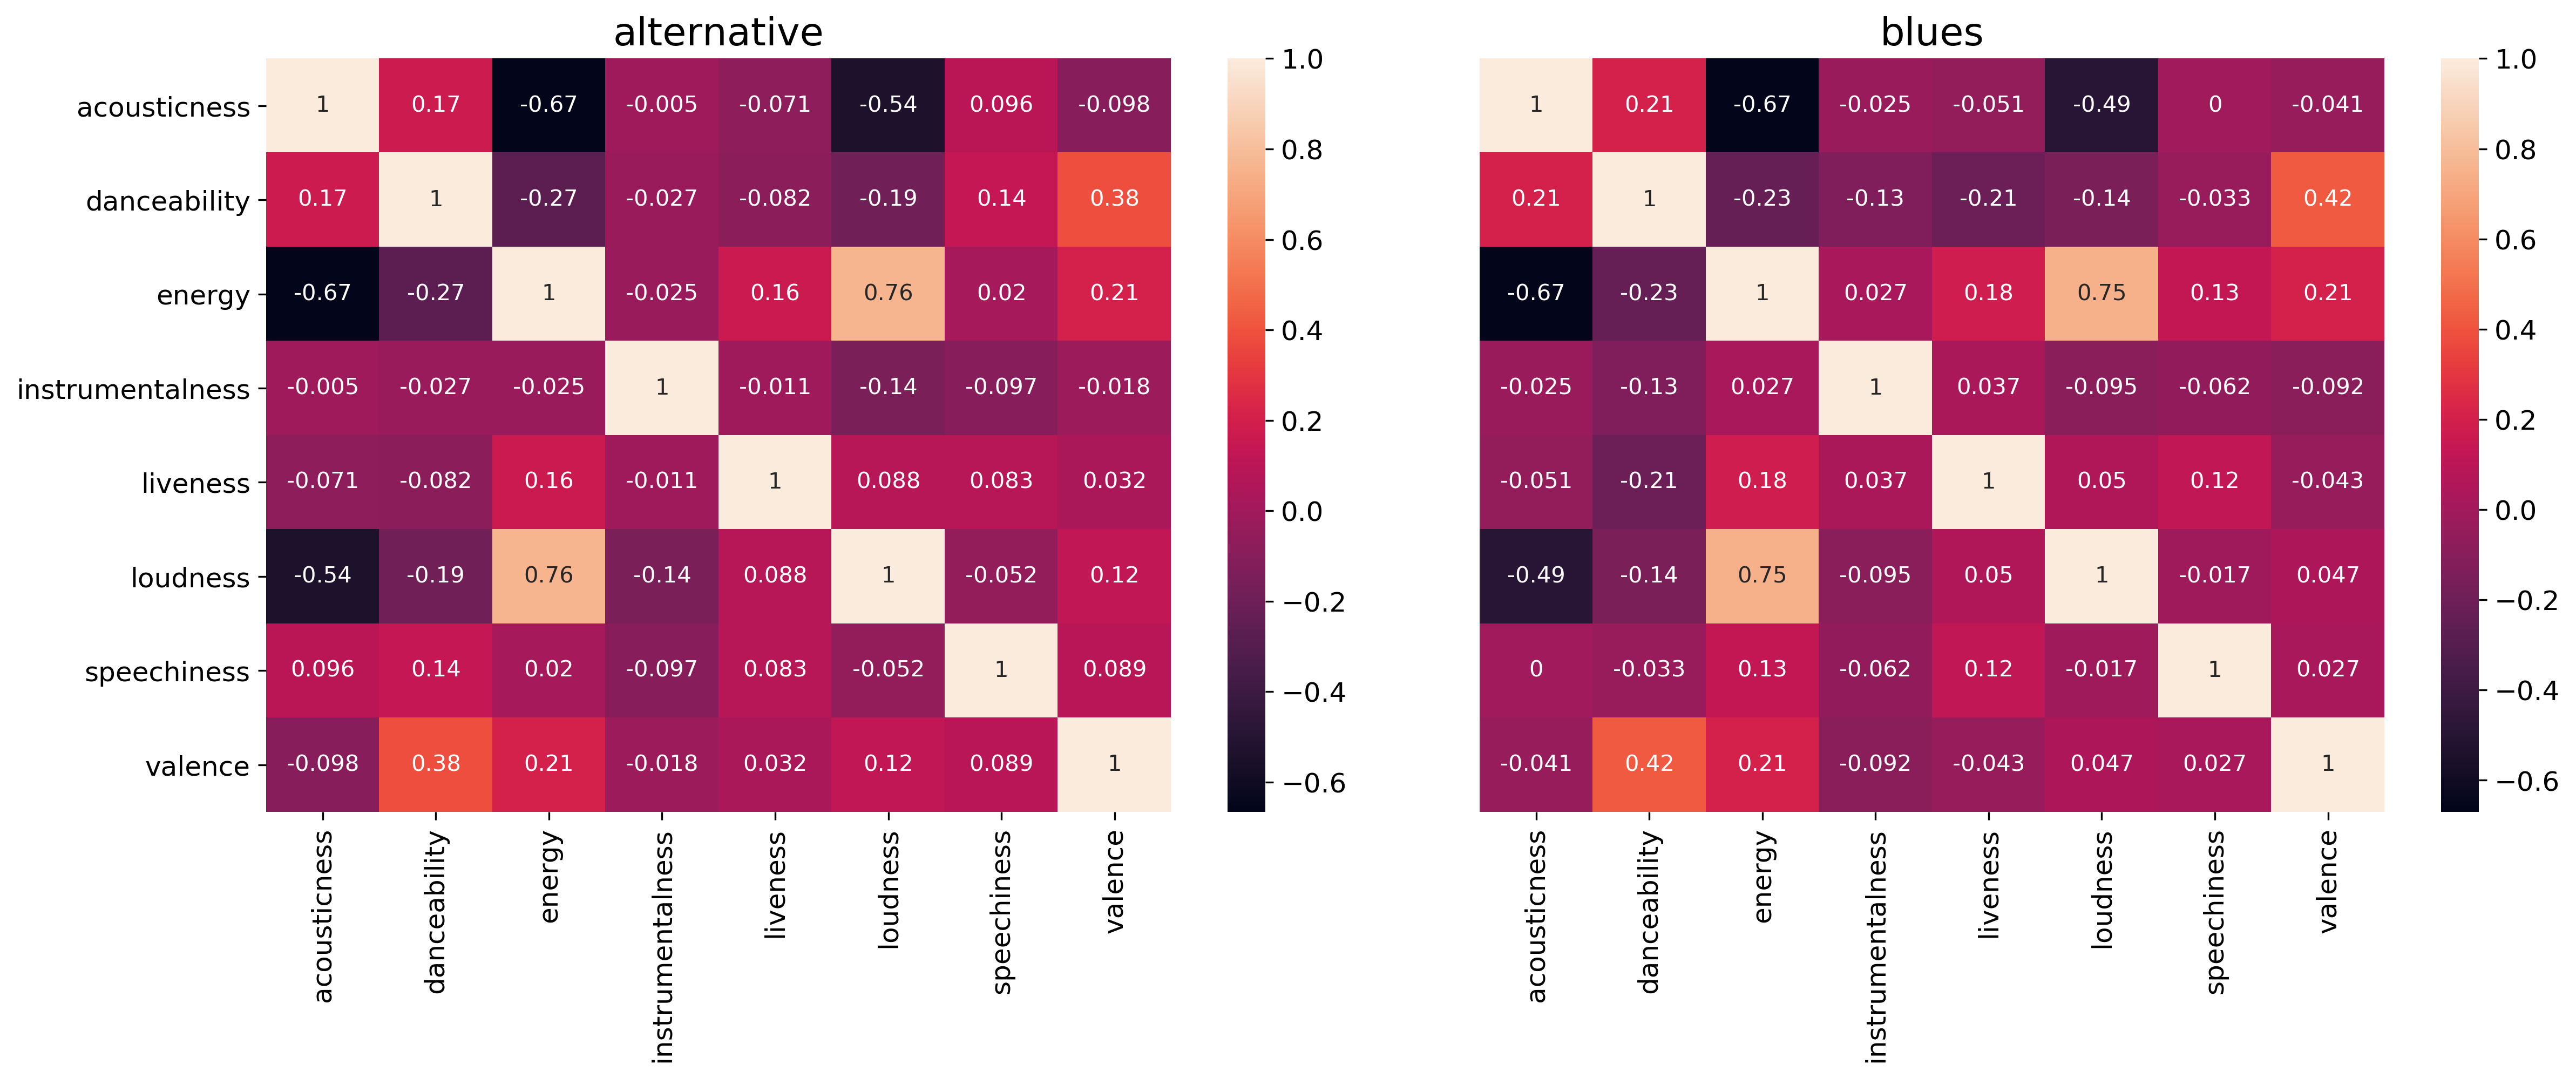

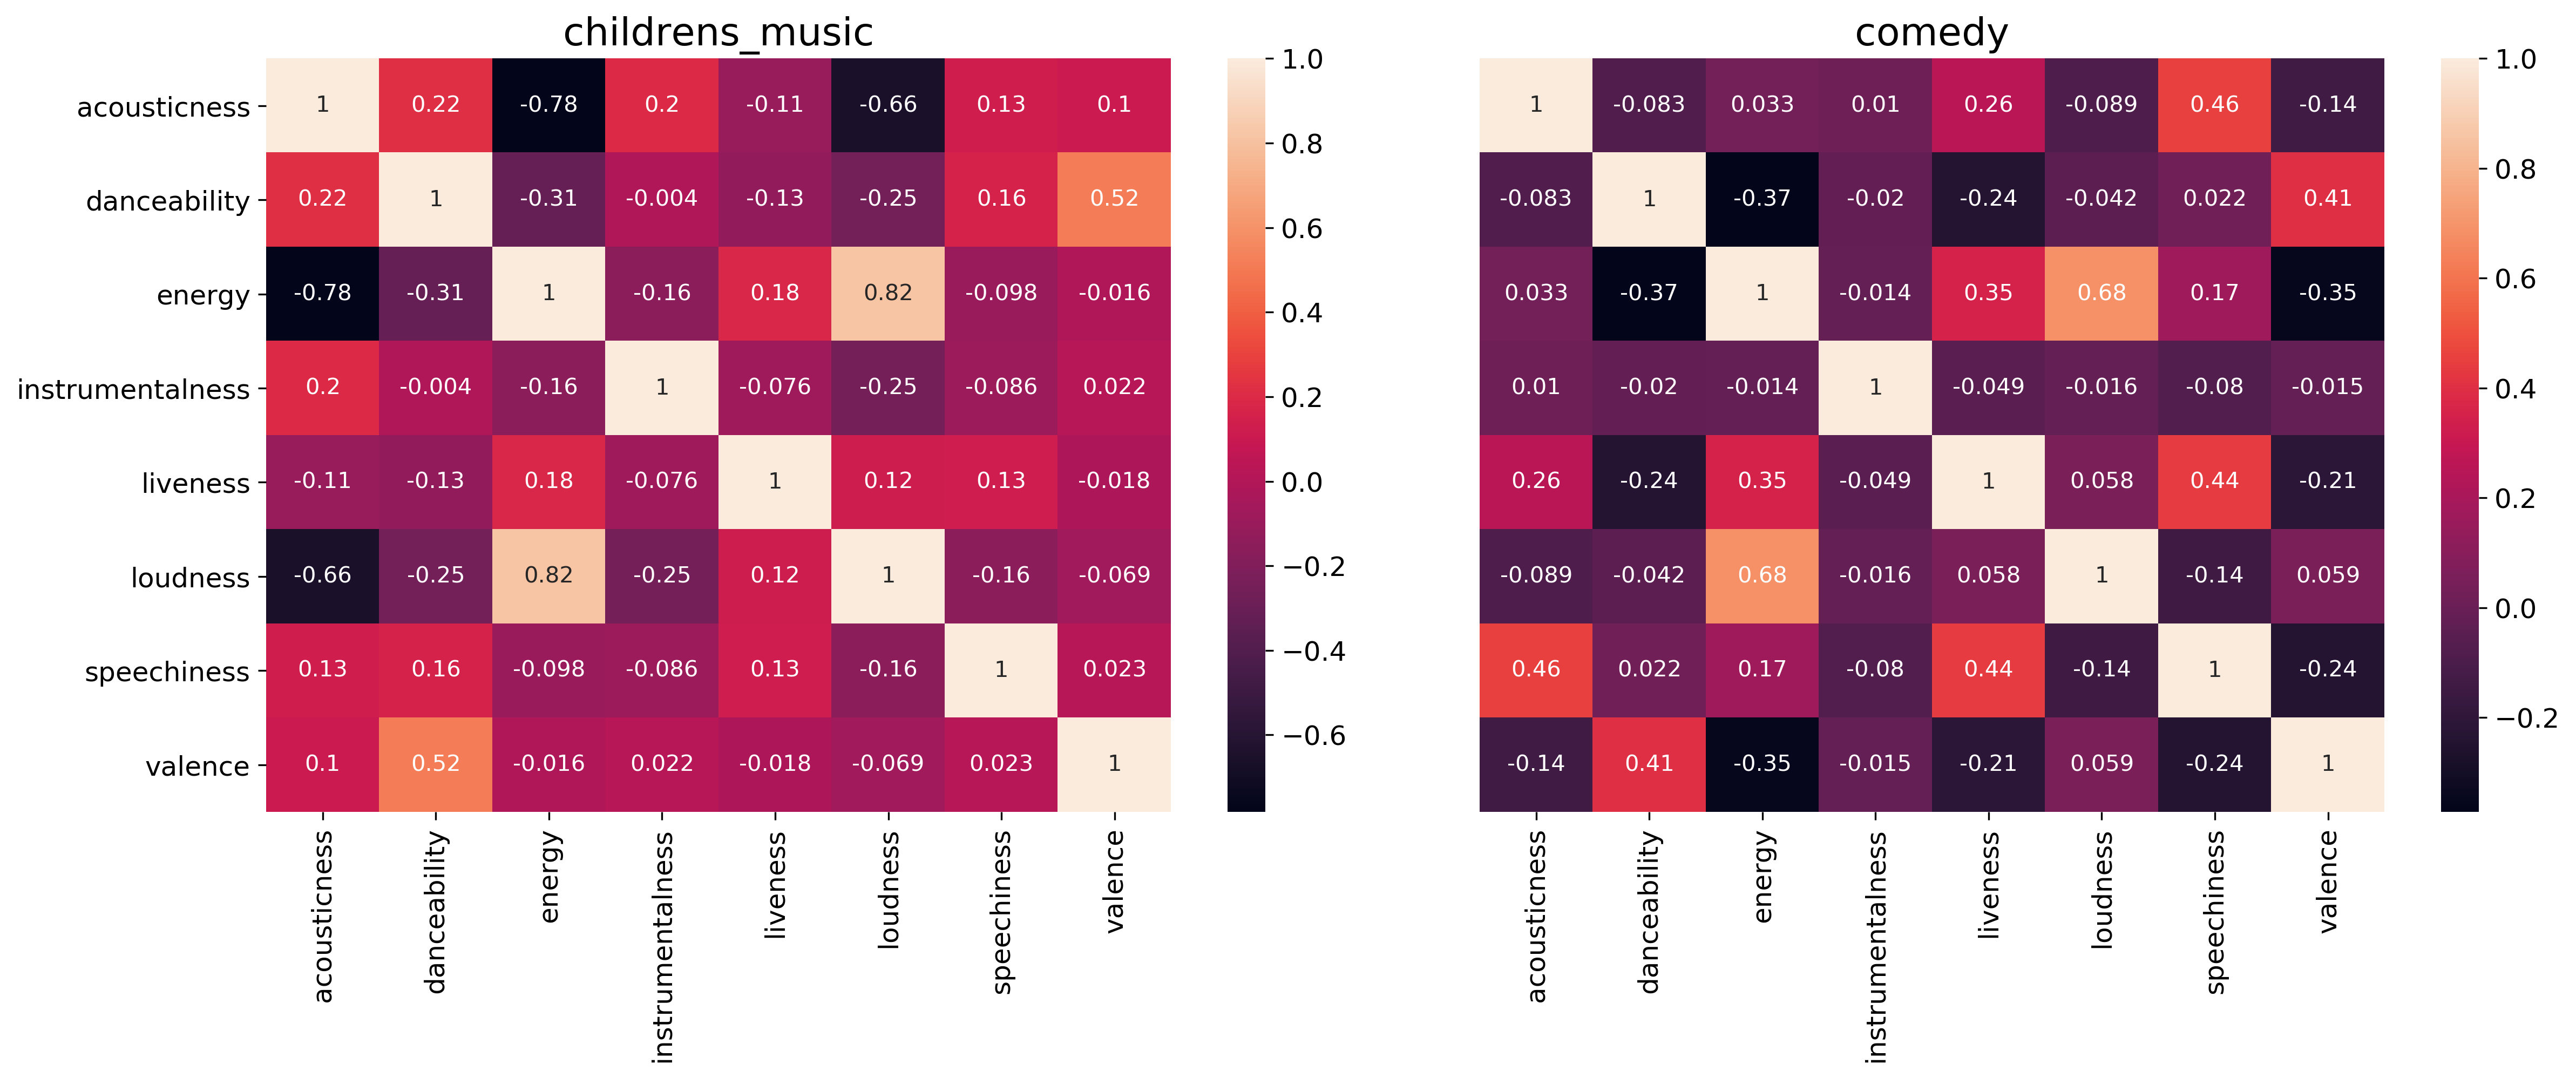

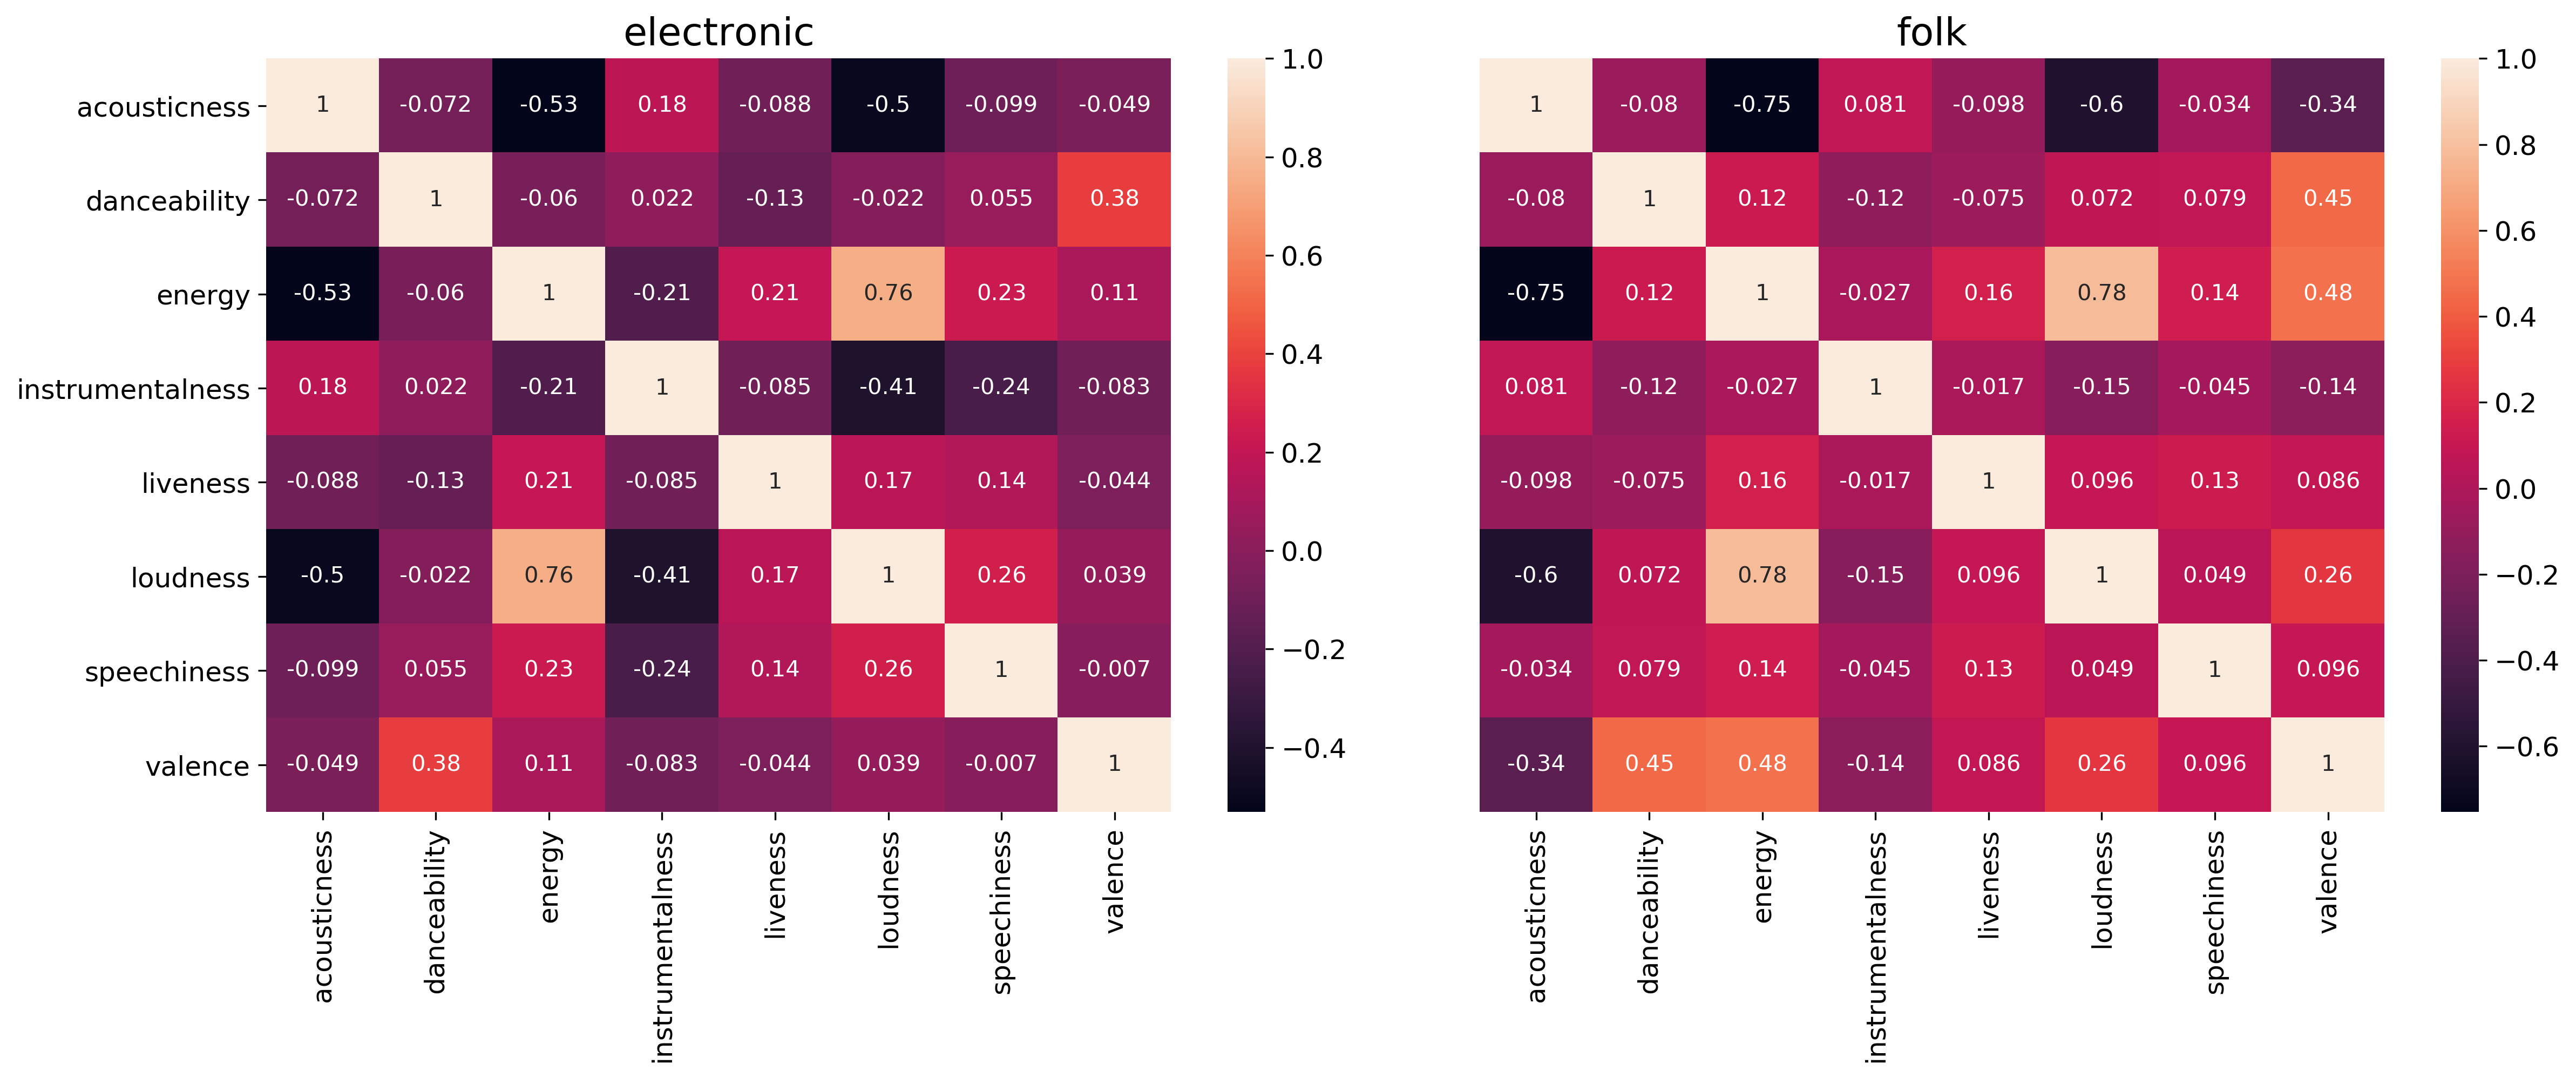

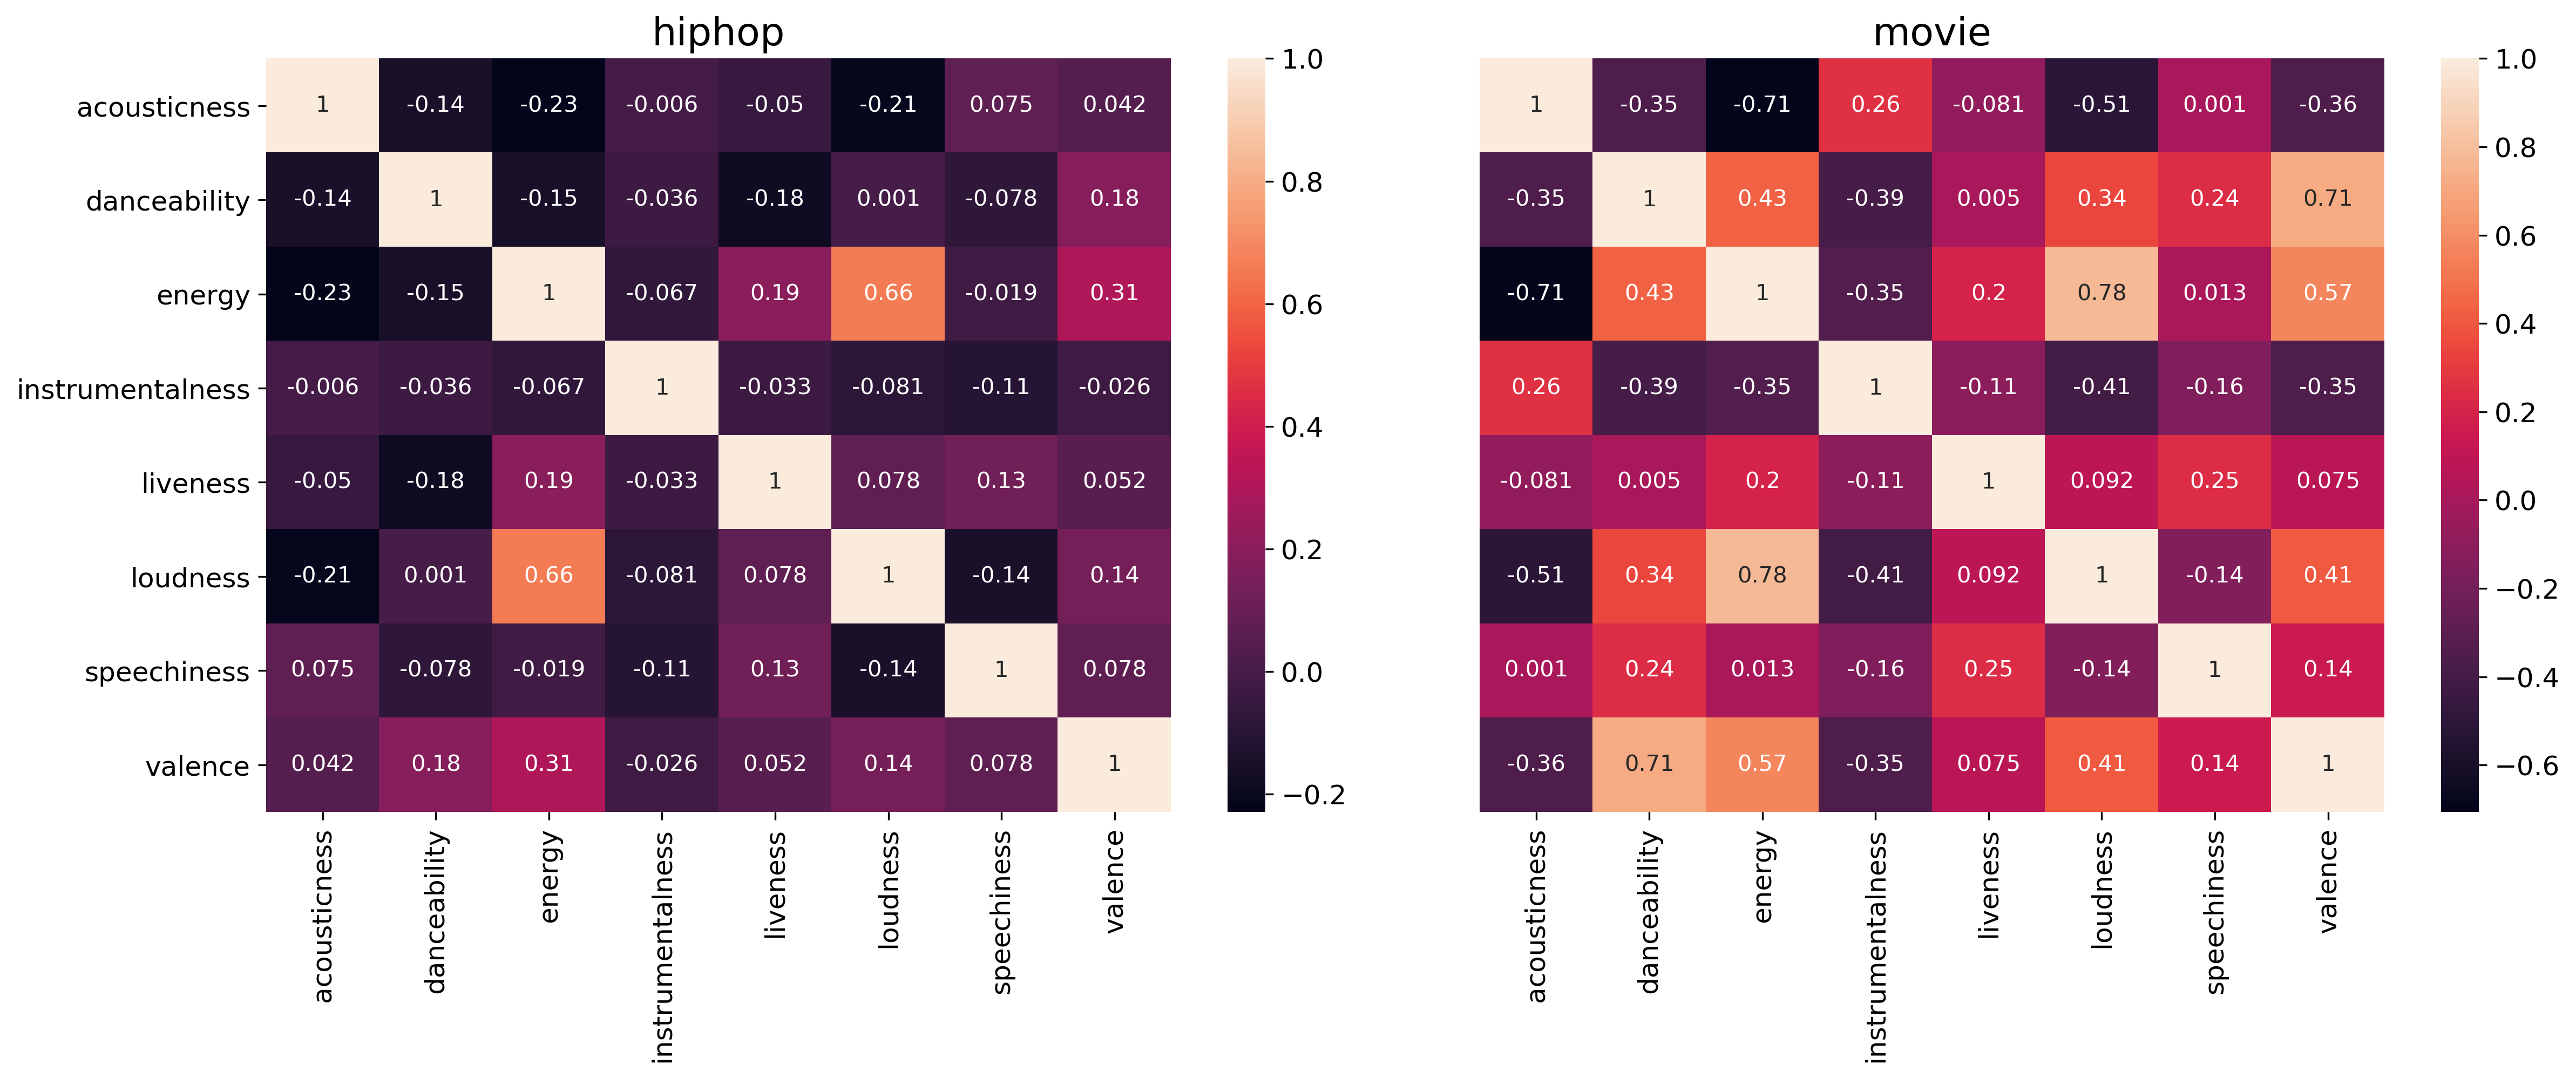

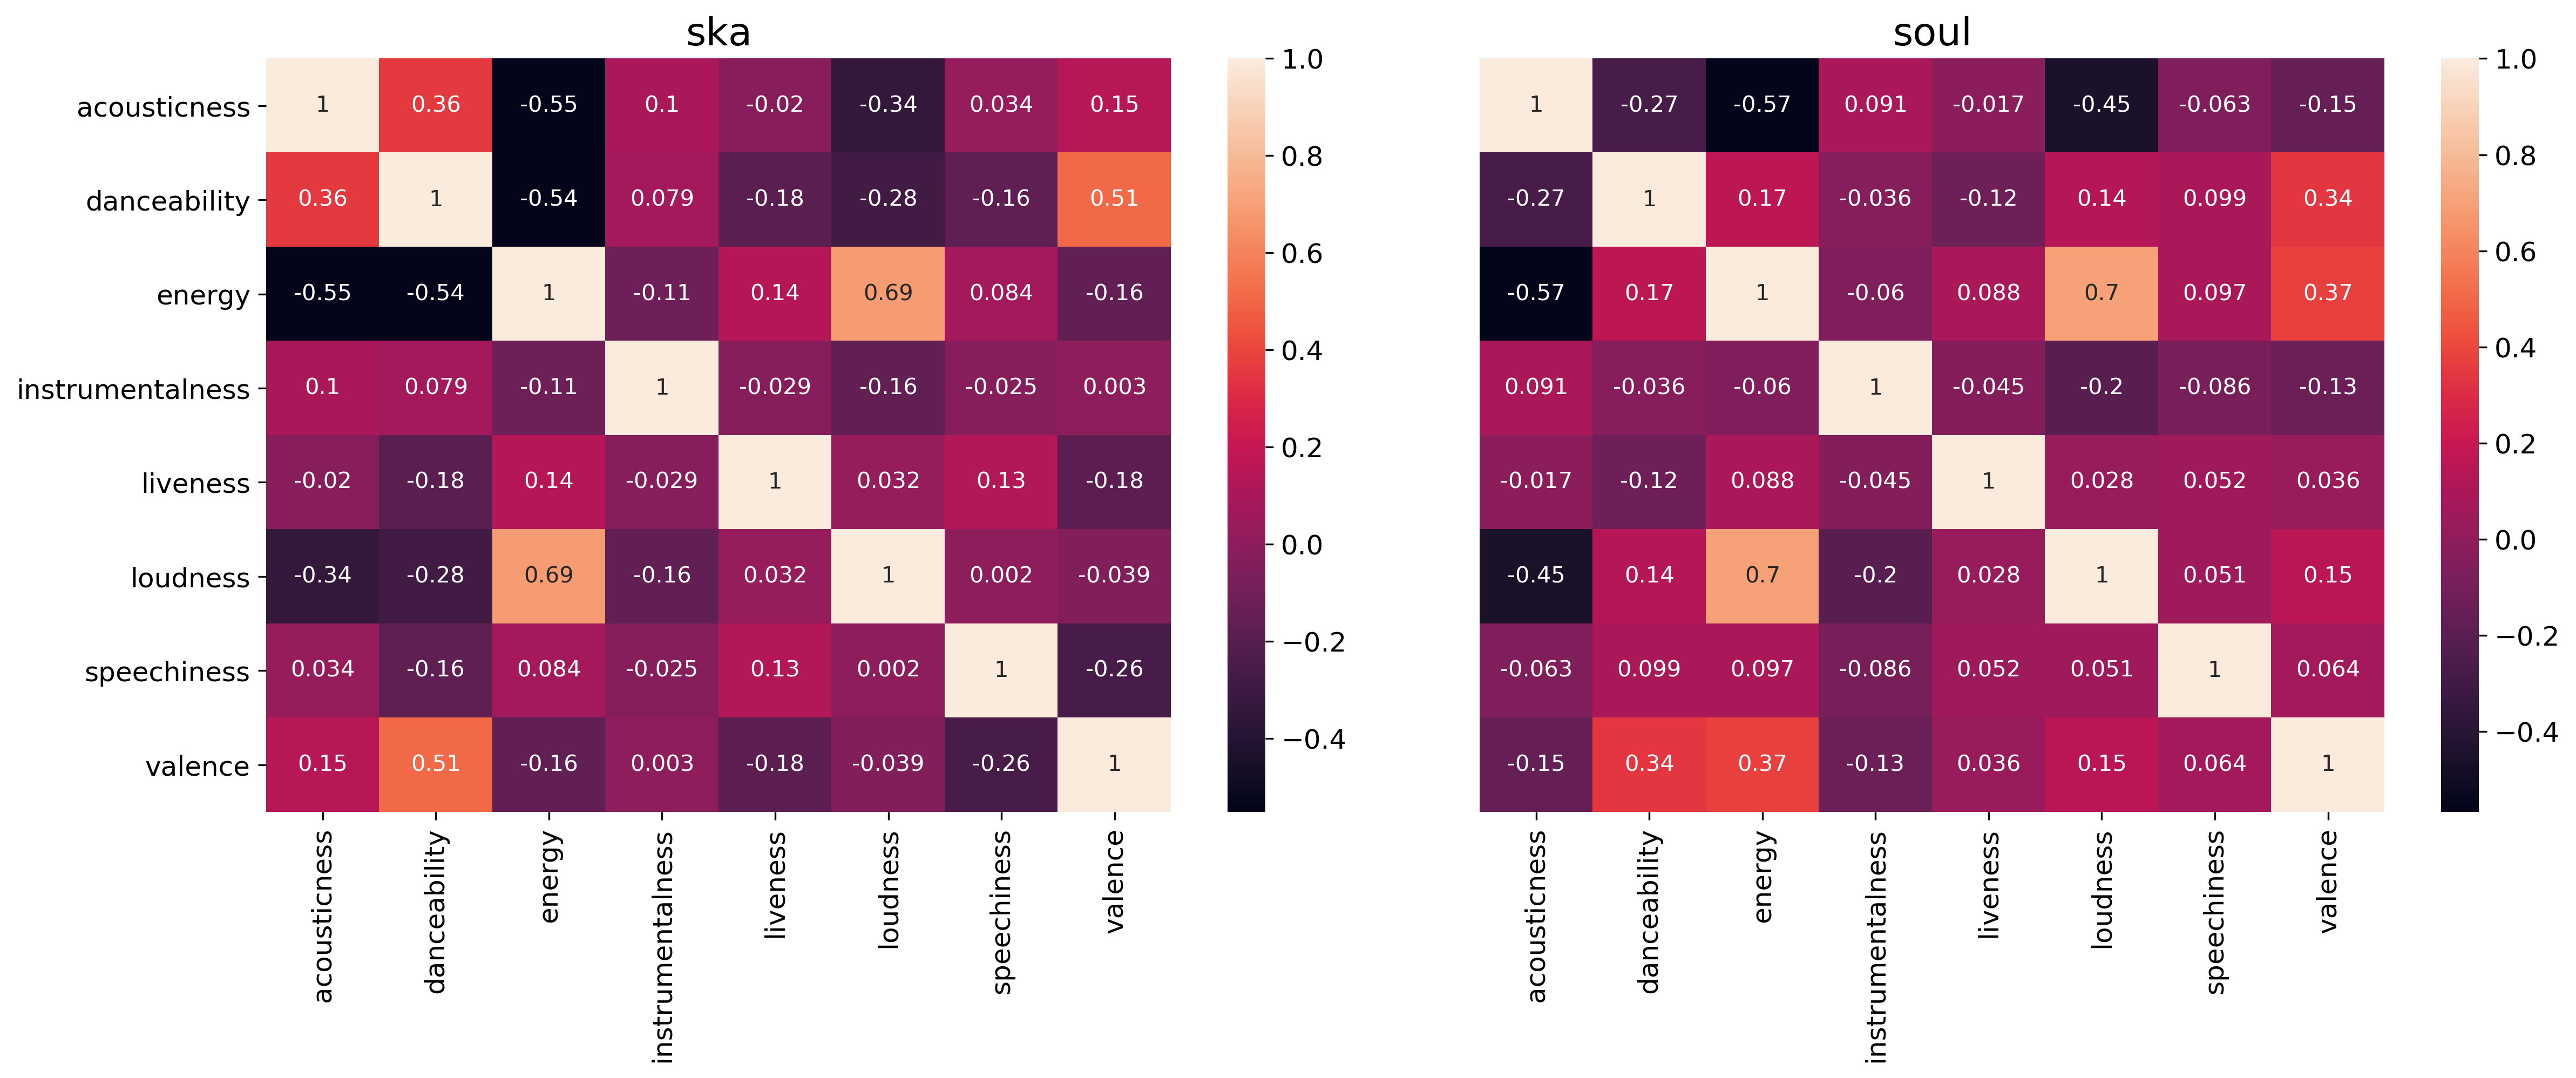

In [10]:
correlation(0,2)
correlation(2,4)
correlation(4,6)
correlation(6,8)
correlation(8,10)

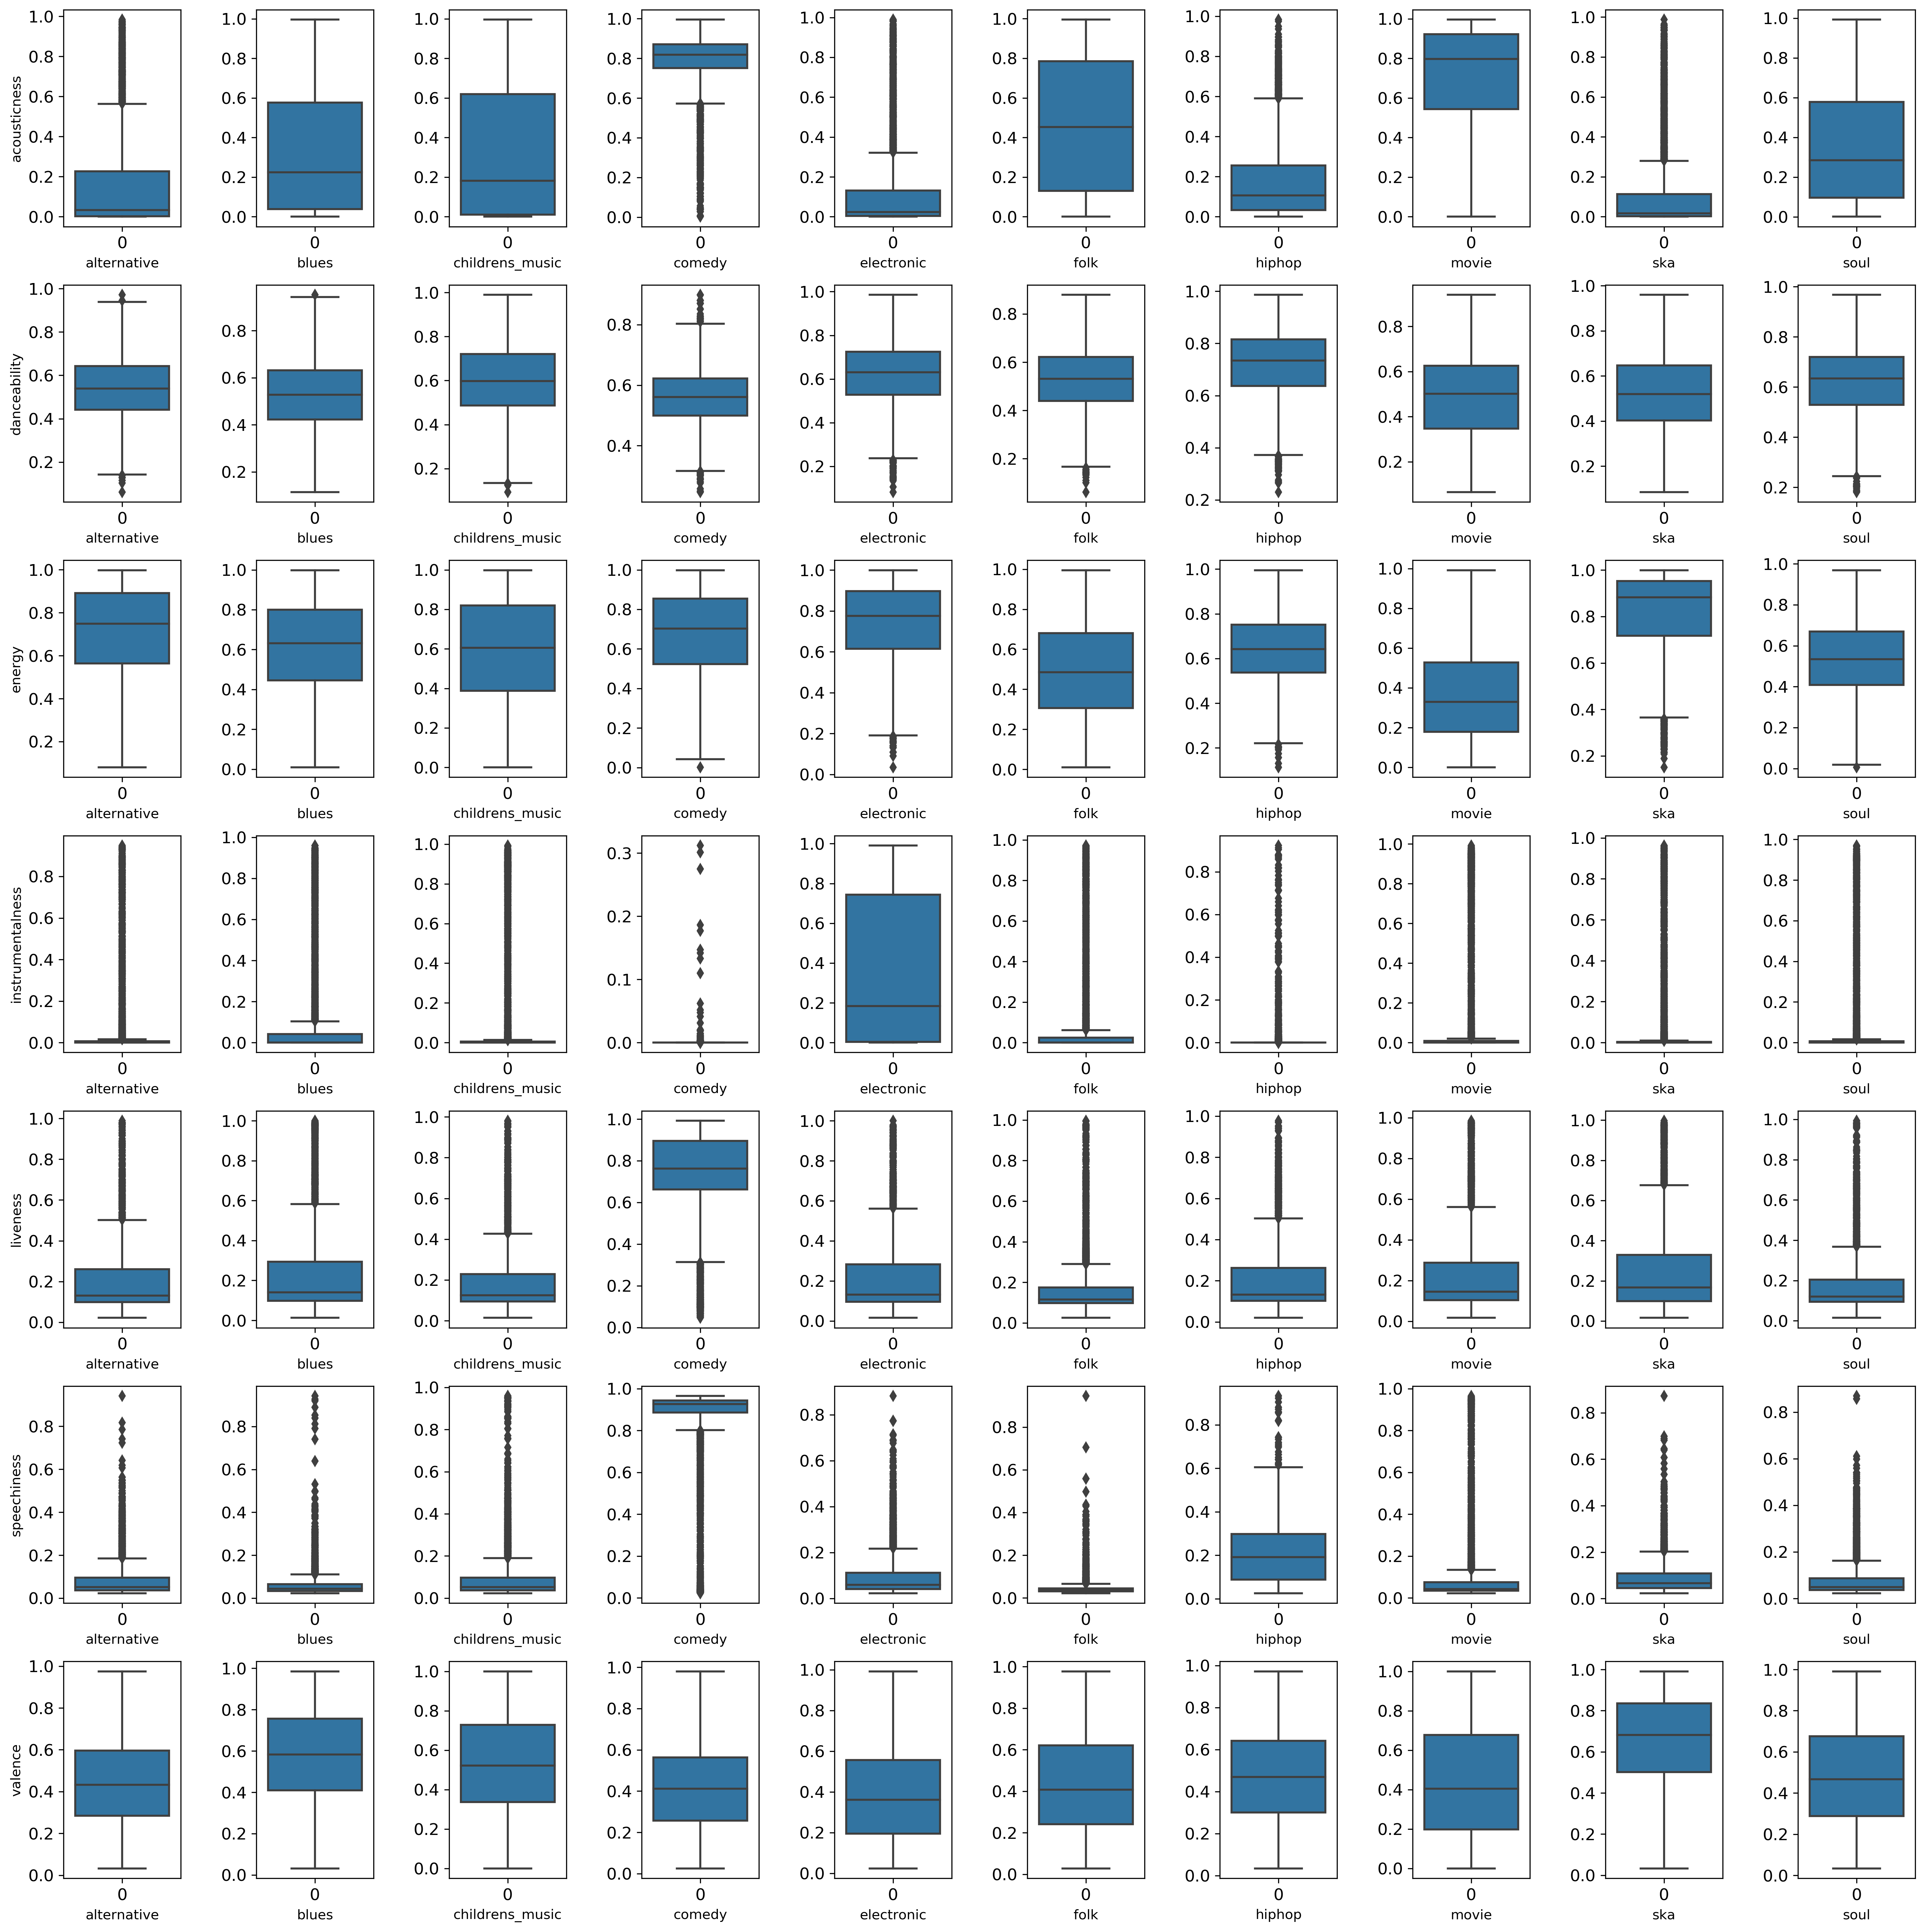

In [11]:
boxplot()

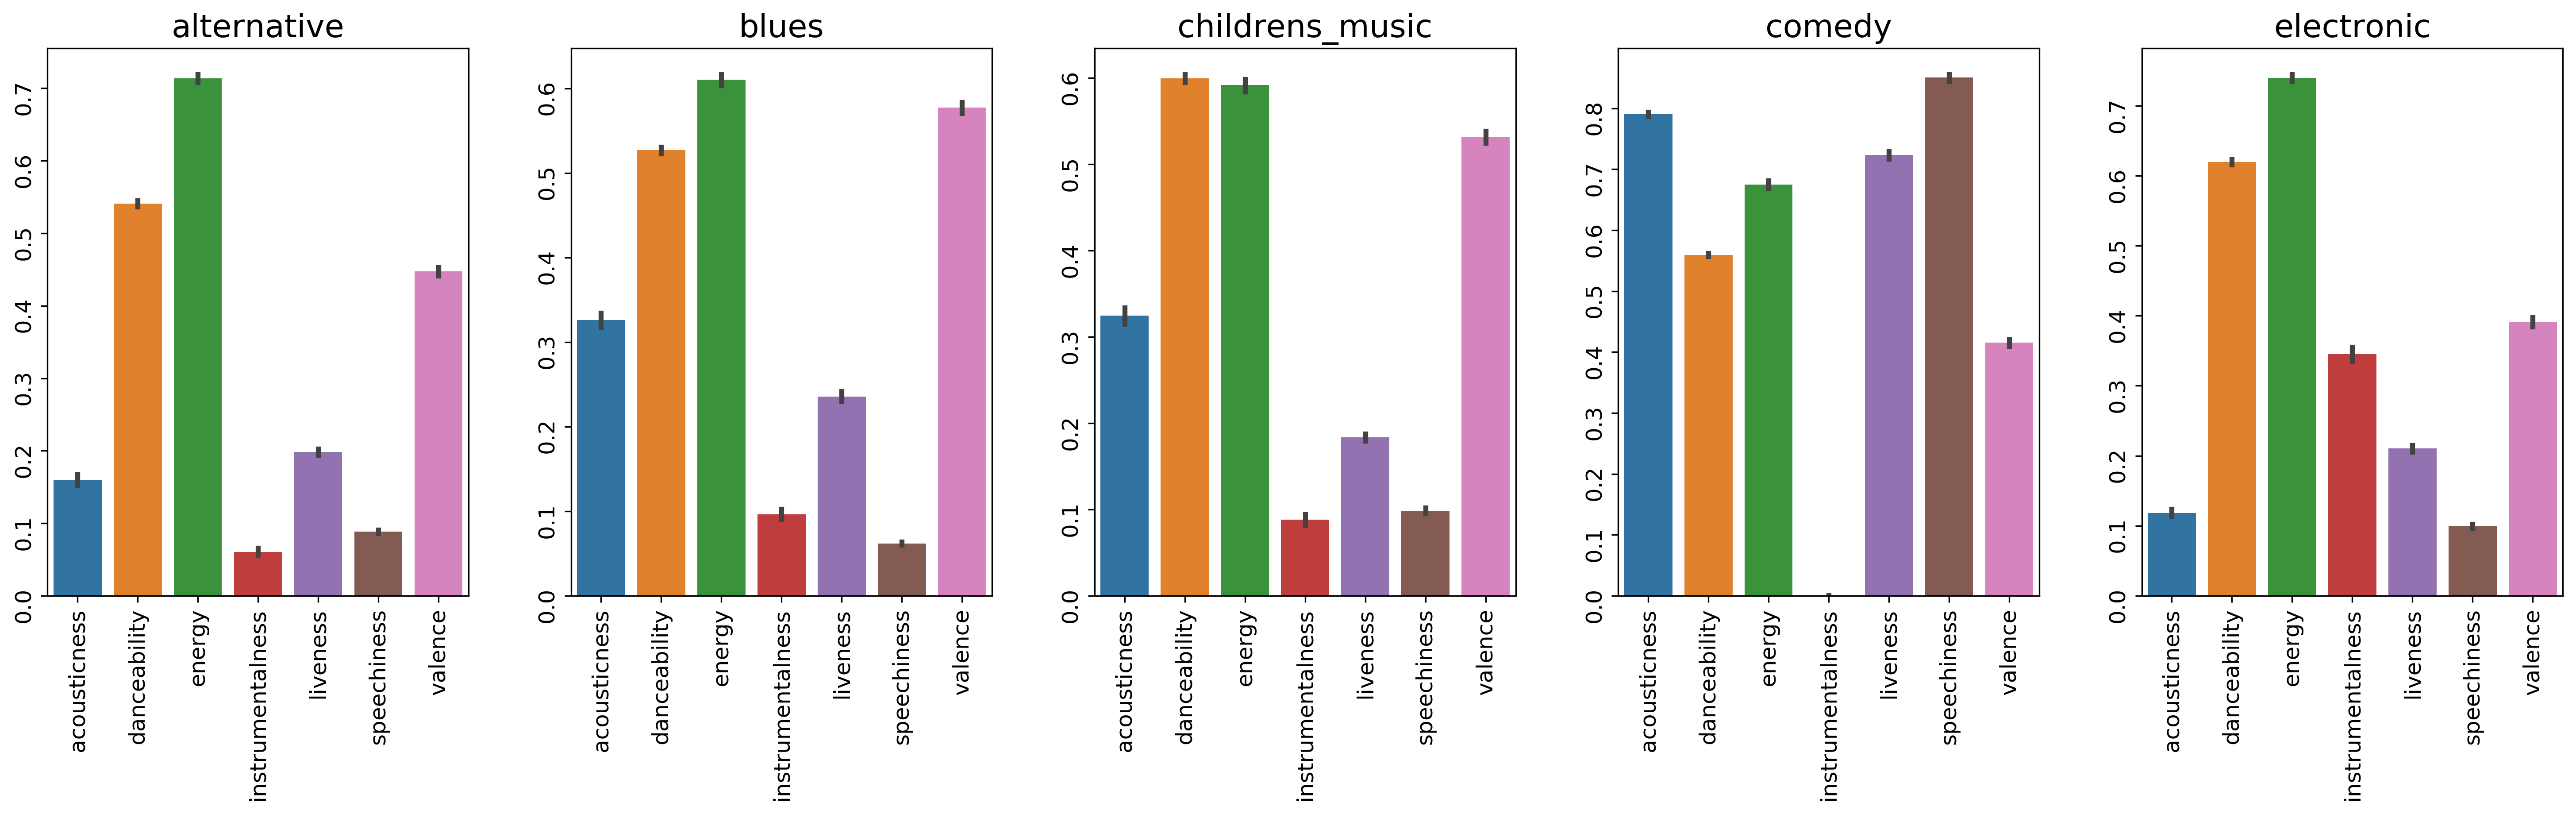

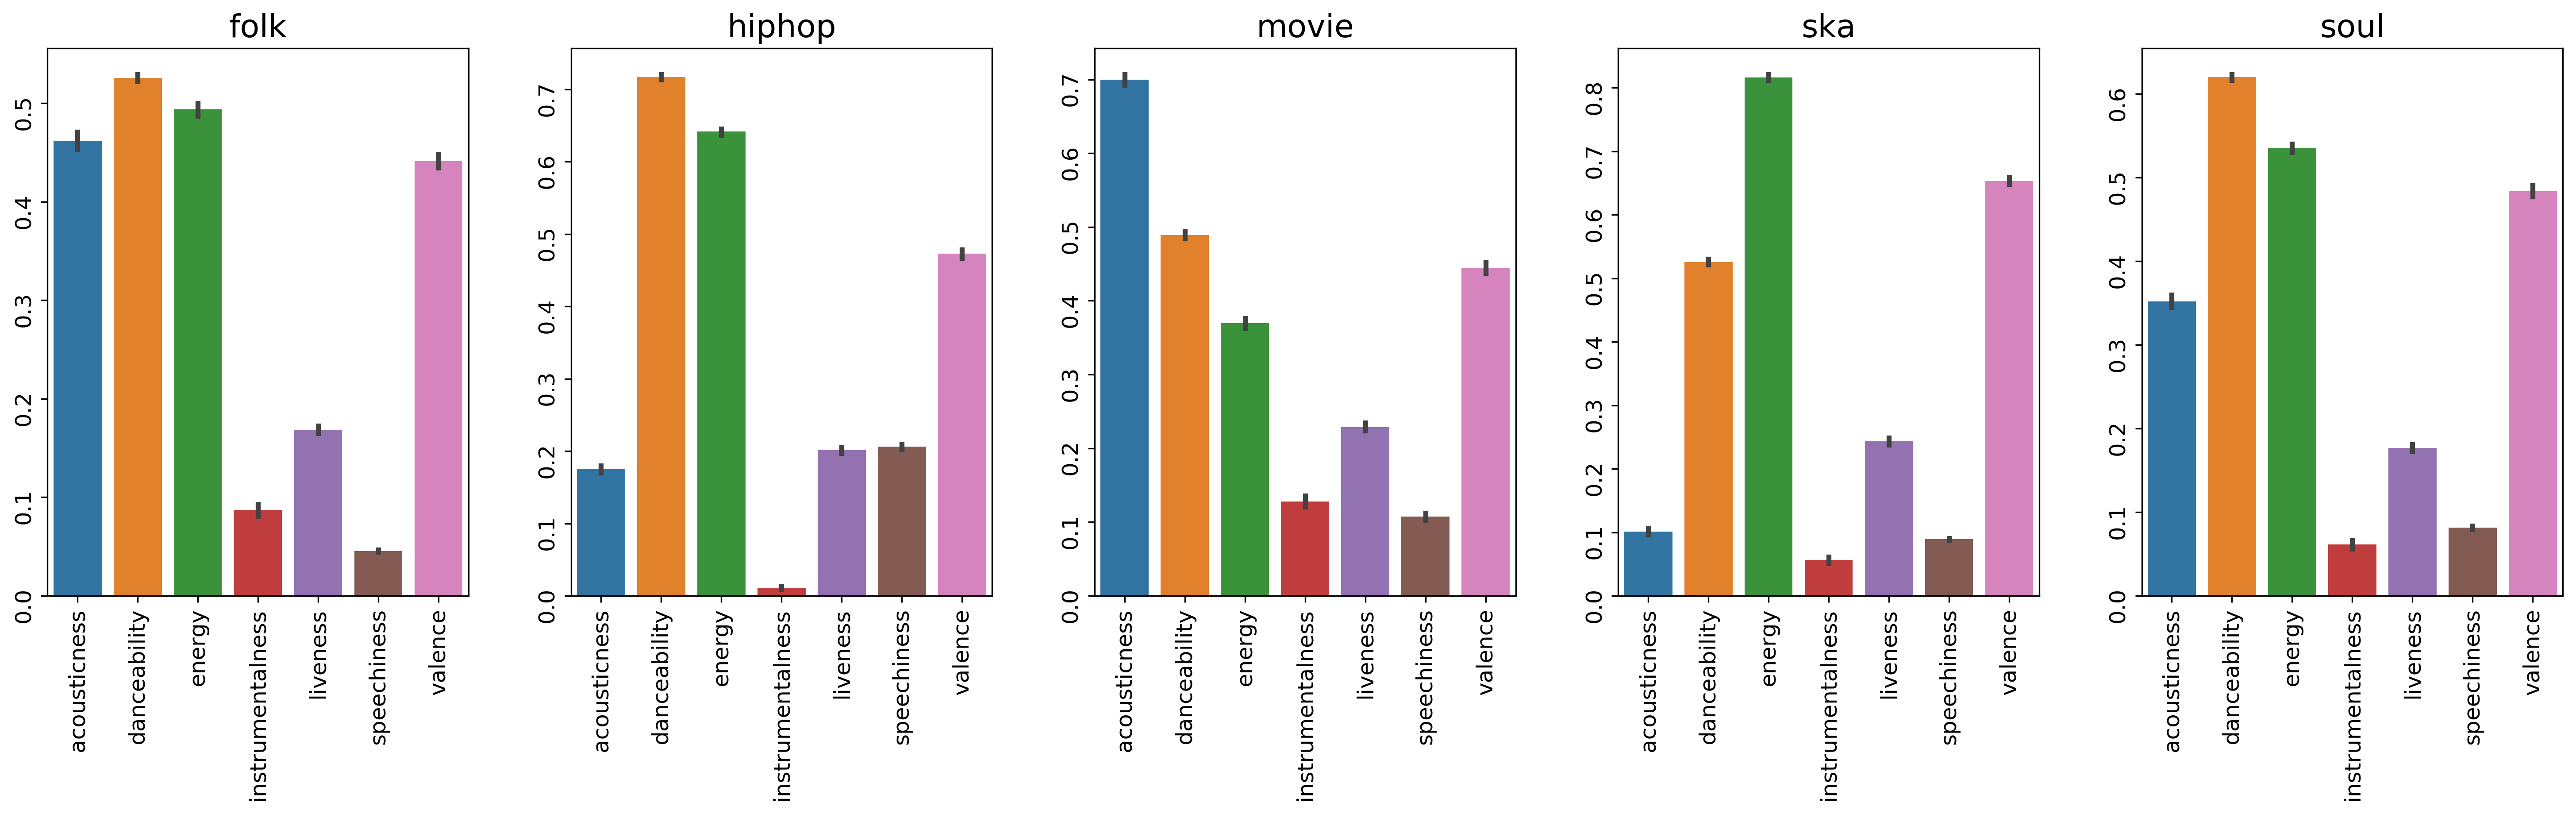

In [12]:
bargraphs(0,5)
bargraphs(5,10)

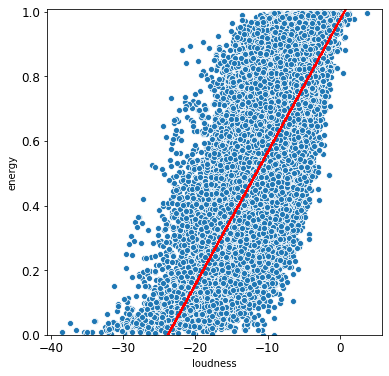

In [13]:
feature_interaction_data = feature_interaction()
x = feature_interaction_data['loudness']
y = feature_interaction_data['Prediction']
true_y = feature_interaction_data['energy']

m, b = np.polyfit(x,y,1)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.scatterplot(x = x, y = true_y)
plt.plot(x, m*x + b, color='red')
plt.ylim([0,1.01])
plt.show()

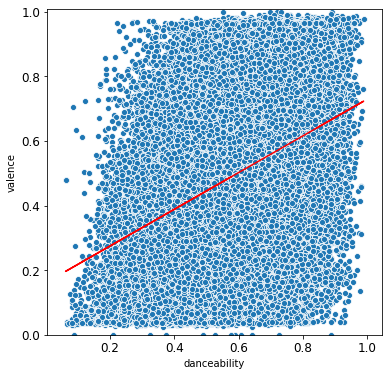

In [14]:
feature_interaction_data1 = feature_interaction1()
x = feature_interaction_data1['danceability']
y = feature_interaction_data1['Prediction']
true_y = feature_interaction_data1['valence']

m1, b1 = np.polyfit(x,y,1)
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.scatterplot(x = x, y = true_y)
plt.plot(x, m1*x + b1, color='red')
plt.ylim([0,1.01])
plt.show()

# Part 2 : Completion

## Initial design

In [15]:
def Initial(df):
    out = df.copy()
    drop_columns = [0,1,2,3,4,7,10,13,15,16]
    for i in drop_columns:
        del out[df.columns[i]]
    
    return out

In [16]:
initial_datasets = []
for dt in datasets:
    df_new = Initial(dt)
    initial_datasets.append(df_new)

In [17]:
initial_data = initial_datasets[0] 
for i in range(1, len(initial_datasets)):
    initial_data = pd.concat([initial_data, initial_datasets[i]])
    
initial_data = initial_data.reset_index(drop = True)
initial_data.head()

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.225000         0.845   0.746          0.000088    0.0785    -5.655   
1      0.665000         0.862   0.342          0.000082    0.1020   -10.095   
2      0.238000         0.590   0.517          0.000000    0.1820    -9.239   
3      0.000077         0.374   0.971          0.000000    0.3220    -4.284   
4      0.002730         0.449   0.971          0.000000    0.1410    -3.660   

   speechiness  valence        genre  
0       0.0383    0.961  Alternative  
1       0.0551    0.177  Alternative  
2       0.0312    0.566  Alternative  
3       0.0697    0.701  Alternative  
4       0.0476    0.414  Alternative

In [18]:
def plots(df1, df2, df3):
    fig, ax = plt.subplots(1,3, figsize = (15, 5), dpi = 80)
    plt.tight_layout(pad = 5.0)

    sns.boxplot(ax = ax[0], data = df1)
    ax[0].set(title = 'Decision Tree', xlabel = "max_depth", ylabel = 'Score')

    sns.boxplot(ax = ax[1], data = df2)
    ax[1].set(title = 'Random Forest', xlabel = "max_depth", ylabel = 'Score')

    sns.boxplot(ax = ax[2], data = df3)
    ax[2].set(title = 'Gaussian NB', xlabel = "var_smoothing", ylabel = 'Score')



    plt.show()

In [19]:
def table():
    return pd.DataFrame(columns = ['Score', 'Paramerter'],
                        index   = ['Decision Tree', 'Random Forest', 'GNB'])

In [20]:
def table_out(df):
    print(tabulate(df, headers = 'keys', tablefmt = 'fancy_grid', numalign = 'center'))

In [21]:
def best_value(df):
    return max(df.mean())

In [22]:
def best_parameter(df):
    value = round(best_value(df), 5);
    for col in df.columns:
        if (round(df[col].mean(), 5) == value): return col

In [23]:
def DecisionTree(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    m1_Score, m3_Score, m5_Score, m8_Score, m10_Score= ([] for i in range(5))
    
    mRange = [1, 3, 5, 8, 10]
    
    for m in (mRange):
        for i in range(20):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
            clf = DecisionTreeClassifier(max_depth = m).fit(X_train, y_train)
            scr = clf.score(X_test, y_test)
            
            if (m == 1):  m1_Score.append(scr)
            if (m == 3):  m3_Score.append(scr)
            if (m == 5):  m5_Score.append(scr)
            if (m == 8):  m8_Score.append(scr)
            if (m == 10): m10_Score.append(scr)
            
    scores = pd.DataFrame({'1': m1_Score, '3': m3_Score, '5': m5_Score, '8': m8_Score, '10': m10_Score})
    return scores

In [24]:
def RandomForest(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    m1_Score, m3_Score, m5_Score, m8_Score, m10_Score = ([] for i in range(5))
    
    mRange = [1, 3, 5, 8,10]
    
    for m in (mRange):
        for i in range(20):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
            clf = RandomForestClassifier(max_depth = m).fit(X_train, y_train)
            scr = clf.score(X_test, y_test)
            
            if (m == 1):  m1_Score.append(scr)
            if (m == 3):  m3_Score.append(scr)
            if (m == 5):  m5_Score.append(scr)
            if (m == 8):  m8_Score.append(scr)
            if (m == 10): m10_Score.append(scr)
        
    
    scores = pd.DataFrame({'1': m1_Score, '3': m3_Score, '5': m5_Score, '8': m8_Score, '10': m10_Score})
    return scores

In [25]:
from sklearn.naive_bayes import GaussianNB

def GaussianNb(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    s9_Score, s5_Score, s1_Score = ([] for i in range(3))
    sRange = [1e-9, 1e-5, 1e-1]
    
    for s in (sRange):
        for i in range(20):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
            nb = GaussianNB(var_smoothing = s).fit(X_train, y_train)
            scr = nb.score(X_test, y_test)
        
            if (s == 1e-9): s9_Score.append(scr)
            if (s == 1e-5): s5_Score.append(scr)
            if (s == 1e-1): s1_Score.append(scr)
    
    scores = pd.DataFrame({'1e-9': s9_Score, '1e-5': s5_Score, '1e-1': s1_Score})
    return scores

In [26]:
Decision_tree = DecisionTree(initial_data)

In [27]:
Random_forest = RandomForest(initial_data)

In [28]:
GNB = GaussianNb(initial_data)

In [29]:
Table_one = table()

for x in range(0,3):
    if (x == 0):
        Table_one.iloc[x,0] = best_value(Decision_tree)
        Table_one.iloc[x,1] = best_parameter(Decision_tree)
    if (x == 1):
        Table_one.iloc[x,0] = best_value(Random_forest)
        Table_one.iloc[x,1] = best_parameter(Random_forest)
    if (x == 2):
        Table_one.iloc[x,0] = best_value(GNB)
        Table_one.iloc[x,1] = best_parameter(GNB)

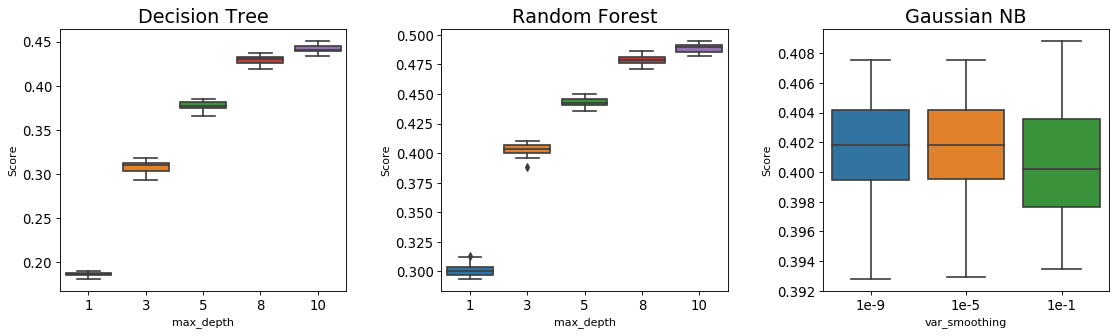

In [30]:
plots(Decision_tree, Random_forest, GNB)

In [31]:
table_out(Table_one)

╒═══════════════╤══════════╤══════════════╕
│               │  Score   │  Paramerter  │
╞═══════════════╪══════════╪══════════════╡
│ Decision Tree │ 0.44179  │      10      │
├───────────────┼──────────┼──────────────┤
│ Random Forest │ 0.488655 │      10      │
├───────────────┼──────────┼──────────────┤
│ GNB           │ 0.401655 │    1e-09     │
╘═══════════════╧══════════╧══════════════╛


## Train data 

In [34]:
def train_data(df):
    out = df.copy()  
    duration_mean = out['duration_ms'].loc[out['duration_ms'] != -1].mean()
    tempo_mean = out['tempo'].loc[out['tempo'] != '?'].astype(np.float64).mean()
       
    for c in range(0, len(out)):
        duration = out.iloc[c,7]
        key = out.iloc[c,10]
        mode = out.iloc[c,13]
        tempo = out.iloc[c,15]
        
        if (duration == -1): out.iloc[c,7] = duration_mean
        if (tempo == '?'): out.iloc[c,15] = tempo_mean
        
        if (mode == 'Minor'): out.iloc[c,13] = 0
        if (mode == 'Major'): out.iloc[c,13] = 1
        
        if (key == 'C'):  out.iloc[c,10] = 0
        if (key == 'C#'): out.iloc[c,10] = 1
        if (key == 'D'):  out.iloc[c,10] = 2
        if (key == 'D#'): out.iloc[c,10] = 3
        if (key == 'E'):  out.iloc[c,10] = 4
        if (key == 'F'):  out.iloc[c,10] = 5
        if (key == 'F#'): out.iloc[c,10] = 6
        if (key == 'G'):  out.iloc[c,10] = 7
        if (key == 'G#'): out.iloc[c,10] = 8
        if (key == 'A'):  out.iloc[c,10] = 9
        if (key == 'A#'): out.iloc[c,10] = 10
        if (key == 'B'):  out.iloc[c,10] = 11
            
                       
                
    drop_list = [0,1,2,3,16]
    for c in drop_list:
        del out[df.columns[c]]
        
    return out

In [35]:
train_dataset = []
for dt in datasets:
    df_new = train_data(dt)
    train_dataset.append(df_new)

In [36]:
train_data1 = train_dataset[0]
for c in range(1, len(train_dataset)):
    train_data1 = pd.concat([train_data1, train_dataset[c]])
train_data1 = train_data1.reset_index(drop = True)

In [37]:
train_data1['duration_ms'] = train_data1['duration_ms'].astype(np.float64)
train_data1['tempo'] = train_data1['tempo'].astype(np.float64)
train_data1 = train_data1.reset_index(drop = True)
train_data1.head()

popularity  acousticness  danceability    duration_ms  energy  \
0          43      0.225000         0.845  238680.000000   0.746   
1          47      0.665000         0.862  166154.000000   0.342   
2          48      0.238000         0.590  219400.000000   0.517   
3          60      0.000077         0.374  233298.562251   0.971   
4          58      0.002730         0.449  233298.562251   0.971   

   instrumentalness key  liveness  loudness mode  speechiness    tempo  \
0          0.000088   5    0.0785    -5.655    0       0.0383  129.970   
1          0.000082  10    0.1020   -10.095    0       0.0551  129.992   
2          0.000000   9    0.1820    -9.239    1       0.0312   80.883   
3          0.000000  11    0.3220    -4.284    0       0.0697   97.625   
4          0.000000  10    0.1410    -3.660    1       0.0476  144.031   

   valence        genre  
0    0.961  Alternative  
1    0.177  Alternative  
2    0.566  Alternative  
3    0.701  Alternative  
4    0.414  Alternative

In [38]:
train_data_copy = train_data1.copy()

In [39]:
#Drop the irrelevent variables in the copied dataset

del train_data_copy['duration_ms']
del train_data_copy['key']
del train_data_copy['mode']
del train_data_copy['tempo']

In [40]:
train_data_copy.head()

popularity  acousticness  danceability  energy  instrumentalness  liveness  \
0          43      0.225000         0.845   0.746          0.000088    0.0785   
1          47      0.665000         0.862   0.342          0.000082    0.1020   
2          48      0.238000         0.590   0.517          0.000000    0.1820   
3          60      0.000077         0.374   0.971          0.000000    0.3220   
4          58      0.002730         0.449   0.971          0.000000    0.1410   

   loudness  speechiness  valence        genre  
0    -5.655       0.0383    0.961  Alternative  
1   -10.095       0.0551    0.177  Alternative  
2    -9.239       0.0312    0.566  Alternative  
3    -4.284       0.0697    0.701  Alternative  
4    -3.660       0.0476    0.414  Alternative

## Test data

In [41]:
testdata =  pd.read_csv('test.csv', header = 0)

In [42]:
def test_data(df):
    out = df.copy()  
    duration_mean = out['duration_ms'].loc[out['duration_ms'] != -1].mean()
    tempo_mean = out['tempo'].loc[out['tempo'] != '?'].astype(np.float64).mean()
       
    for c in range(0, len(out)):
        duration = out.iloc[c,7]
        tempo = out.iloc[c,15]
            
        if (duration == -1): out.iloc[c,7] = duration_mean
        if (tempo == '?'): out.iloc[c,15] = tempo_mean
                   
                
    drop_list = [1,2,3,8,10,11,13,16]
    for c in drop_list:
        del out[df.columns[c]]
        
    return out

In [43]:
testdata = test_data(testdata)
testdata['duration_ms'] = testdata['duration_ms'].astype(np.float64)
testdata['tempo'] = testdata['tempo'].astype(np.float64)
testdata.head()

instance_id  popularity  acousticness  danceability  duration_ms  \
0            1          41      0.255000         0.699     218733.0   
1            2          38      0.364000         0.649     159067.0   
2            3          55      0.445000         0.457     234802.0   
3            4           7      0.332000         0.756      78760.0   
4            5          54      0.000583         0.595     223427.0   

   instrumentalness  loudness  speechiness    tempo  valence  
0          0.256000    -4.110       0.3890  146.064    0.365  
1          0.000008    -9.389       0.0334   81.911    0.600  
2          0.000000   -10.500       0.2430  201.472    0.498  
3          0.000000    -5.477       0.0279   88.980    0.839  
4          0.000001    -4.115       0.0323  101.987    0.643

### Prediction- initial ( Decision tree)

In [44]:
def predict_dt(train, test):
    
    X = train.iloc[:,:-1]
    y = train.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    
    X_Test = test.iloc[:,1:]
    X_Test = StandardScaler().fit_transform(X_Test)
    
    clf = DecisionTreeClassifier().fit(X, y)
    pred = clf.predict(X_Test)
    
    out = pd.DataFrame(testdata.iloc[:,0])
    out['genre'] = pred

    return out

In [45]:
copy = train_data_copy.copy()
results_dt = predict_dt(copy, testdata)
results_dt['genre'].value_counts()

Hip-Hop             4710
Electronic          3714
Soul                3596
Movie               3471
Ska                 3080
Children's Music    3043
Alternative         2826
Blues               2742
Folk                2244
Comedy              1505
Name: genre, dtype: int64

In [46]:
#results_dt.to_csv('result_decisionTree.csv')

### Prediction- initial (Random Forest)

In [47]:
def predict_rf(train, test):
    
    X = train.iloc[:,:-1]
    y = train.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    X_Test = test.iloc[:,1:]
    X_Test = StandardScaler().fit_transform(X_Test)
    
    clf = RandomForestClassifier(max_depth=1 , random_state=0).fit(X, y)
    pred = clf.predict(X_Test)
    
    out = pd.DataFrame(testdata.iloc[:,0])
    out['genre'] = pred

    return out

In [48]:
copy1 = train_data_copy.copy()
results_rf = predict_rf(copy, testdata)
results_rf['genre'].value_counts()

Hip-Hop        7566
Ska            6690
Movie          5992
Alternative    5444
Folk           2678
Comedy         2561
Name: genre, dtype: int64

### Prediction- initial (NB)

In [49]:
def predict_NB(train, test):
    
    X = train.iloc[:,:-1]
    y = train.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    X_Test = test.iloc[:,1:]
    X_Test = StandardScaler().fit_transform(X_Test)
    
    clf = GaussianNB().fit(X, y)
    pred = clf.predict(X_Test)
    
    out = pd.DataFrame(testdata.iloc[:,0])
    out['genre'] = pred

    return out

In [50]:
copy2 = train_data_copy.copy()
results_NB = predict_NB(copy, testdata)
results_NB['genre'].value_counts()

Hip-Hop             8277
Movie               6511
Children's Music    3906
Soul                2885
Electronic          2852
Blues               1831
Alternative         1772
Ska                 1243
Comedy              1055
Folk                 599
Name: genre, dtype: int64

In [51]:
#results_NB.to_csv('result_NB.csv')

## Part 2  - Intermediary system

In [52]:
td = train_data1.copy()
X = td.iloc[:,:-1]
y = td.iloc[:, -1]
XT = StandardScaler().fit_transform(X)

DT_Score, RF_Score, NB_Score = ([] for i in range(3))
for i in range(0, 6):
    X_train, X_test, y_train, y_test = train_test_split(XT, y, test_size = 0.50, random_state = i)

    DT = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    NB = GaussianNB()

    DT.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    NB.fit(X_train, y_train)
    
    DT_Score.append(DT.score(X_test, y_test))
    RF_Score.append(RF.score(X_test, y_test))
    NB_Score.append(NB.score(X_test, y_test))
    
    
print("Decision Trr average score:", np.mean(DT_Score))
print("Random Forest average score:", np.mean(RF_Score))
print("Gaussain NB average score:", np.mean(NB_Score))

Decision Trr average score: 0.5396133333333333
Random Forest average score: 0.6625933333333334
Gaussain NB average score: 0.5187866666666666


## Best model

In [53]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.pipeline import FeatureUnion

In [54]:
#Run RFE to identify redundant/irrelavant feature(s)
X = train_data1.iloc[:,:-1]
y = train_data1.iloc[:,- 1]
X = pd.DataFrame(StandardScaler().fit_transform(X))

best_model =RandomForestClassifier()
rfe = RFE(best_model, n_features_to_select = 9).fit(X, y)

RFE_result = pd.DataFrame(rfe.support_).T
RFE_result.columns = train_data1.columns[:-1]
RFE_result

popularity  acousticness  danceability  duration_ms  energy  \
0        True          True          True         True    True   

   instrumentalness    key  liveness  loudness   mode  speechiness  tempo  \
0              True  False     False     False  False         True   True   

   valence  
0     True

In [55]:
# Remove irrelavant variables from output above.

del train_data1['key']
del train_data1['liveness']
del train_data1['loudness']
del train_data1['mode']

In [56]:
train_data1.head()

popularity  acousticness  danceability    duration_ms  energy  \
0          43      0.225000         0.845  238680.000000   0.746   
1          47      0.665000         0.862  166154.000000   0.342   
2          48      0.238000         0.590  219400.000000   0.517   
3          60      0.000077         0.374  233298.562251   0.971   
4          58      0.002730         0.449  233298.562251   0.971   

   instrumentalness  speechiness    tempo  valence        genre  
0          0.000088       0.0383  129.970    0.961  Alternative  
1          0.000082       0.0551  129.992    0.177  Alternative  
2          0.000000       0.0312   80.883    0.566  Alternative  
3          0.000000       0.0697   97.625    0.701  Alternative  
4          0.000000       0.0476  144.031    0.414  Alternative

In [57]:
simplefilter(action='ignore', category=FutureWarning)

X_gv = train_data1.iloc[:,:-1]
y_gv = train_data1.iloc[:, -1]
X_gv = StandardScaler().fit_transform(X_gv)

DT_grid = { 'max_depth': [1, 3, 5, 8, 10]}
RF_grid = {'n_estimators': [50, 100, 150, 180], 'max_depth': [1, 3, 5, 8, 10], 'max_features': [2, 4, 6, 8, 9]}
NB_grid = {'var_smoothing': [1e-9, 1e-5,1e-1]}

DT_search = GridSearchCV(DecisionTreeClassifier(), DT_grid, cv=3).fit(X_gv, y_gv)
RF_search = GridSearchCV(RandomForestClassifier(), RF_grid, cv=3, n_jobs=-1).fit(X_gv, y_gv)
NB_search = GridSearchCV(GaussianNB(), NB_grid, cv=3, n_jobs=-1).fit(X_gv, y_gv)

In [58]:
print(DT_search.best_estimator_, "Decision Tree best score :", DT_search.best_score_, "\n")
print(RF_search.best_estimator_,"Random forest best score :", RF_search.best_score_, "\n")
print(NB_search.best_estimator_,"NB best score :", NB_search.best_score_, "\n")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') Decision Tree best score : 0.5945798820733054 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_

In [59]:
RF_important = RF_search.best_estimator_.feature_importances_
t1= train_data1.iloc[:,:-1]
finalt1= pd.DataFrame(zip(RF_important, t1))
finalt1

0                 1
0  0.270334        popularity
1  0.117864      acousticness
2  0.074746      danceability
3  0.097821       duration_ms
4  0.079088            energy
5  0.078682  instrumentalness
6  0.199667       speechiness
7  0.044202             tempo
8  0.037596           valence

In [61]:
X_gv = train_data1.iloc[:,:-1]
y_gv = train_data1.iloc[:, -1]
X_gv = StandardScaler().fit_transform(X_gv)

scores = []
for i in range(0, 11):
    X_train, X_test, y_train, y_test = train_test_split(X_gv, y_gv, test_size = 0.6, random_state = i)
    
    clf = RandomForestClassifier(max_features=2, n_estimators=150)
    clf.fit(X_train, y_train)
    
    scores.append(clf.score(X_test, y_test))
    
print("Average Acuracy Score:", np.mean(scores))
    

Average Acuracy Score: 0.6673454545454546


## Test data

In [62]:
def predict_RandomForest(train, test):
    X = train.iloc[:,:-1]
    y = train.iloc[:, -1]
    X = StandardScaler().fit_transform(X)
    
    X_Test = test.iloc[:,1:]
    X_Test = StandardScaler().fit_transform(X_Test)
    
    clf = RandomForestClassifier(max_depth=None, n_estimators=200).fit(X, y)
    pred = clf.predict(X_Test)
    
    out = pd.DataFrame(test.iloc[:,0])
    out['genre'] = pred

    return out

In [63]:
copy3 = train_data1.copy()
results_rf_final = predict_RandomForest(copy3, testdata)
results_rf_final['genre'].value_counts()

Folk                4372
Soul                3703
Electronic          3693
Blues               3664
Hip-Hop             3393
Comedy              2999
Movie               2878
Alternative         2587
Ska                 1961
Children's Music    1681
Name: genre, dtype: int64

In [64]:
results_rf_final.to_csv('result_RF_Final.csv')